In [1]:
from miscpy.utils.sympyhelpers import *
init_printing()
from sympy.utilities.codegen import codegen

## Set up rotation matrices representing a 3-1-3 $(\psi,\theta,\phi)$ Euler angle set.

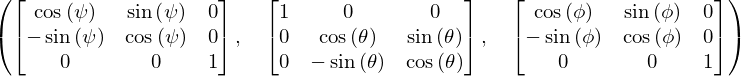

In [2]:
aCi = rotMat(3,psi)
cCa = rotMat(1,th)
bCc = rotMat(3,ph)
aCi,cCa,bCc

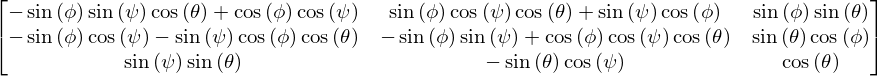

In [3]:
bCi = bCc*cCa*aCi; bCi #3-1-3 rotation

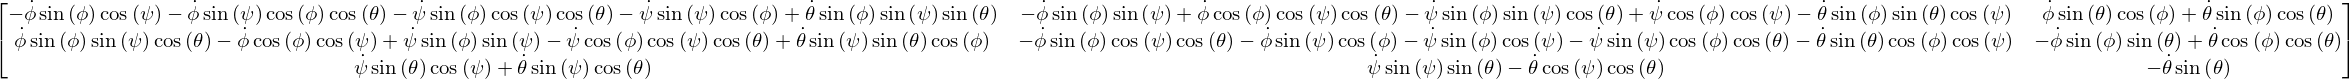

In [4]:
bCi_dot = difftotalmat(bCi,t,{th:thd,psi:psid,ph:phd});
bCi_dot

## $\tilde{\omega} = {}^\mathcal{B}C^{\mathcal{I}}  {}^\mathcal{B}{\dot{C}}^{\mathcal{I}}$

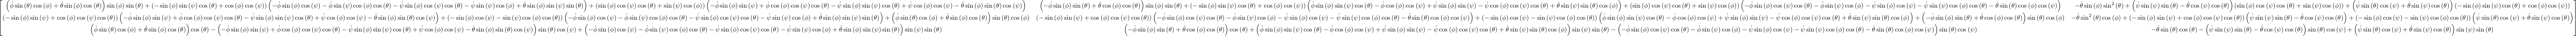

In [5]:
omega_tilde = bCi*bCi_dot.T; omega_tilde

## $\left[{}^\mathcal{I}\boldsymbol{\omega}^{\mathcal{B}}\right]_\mathcal{B} = \left[ {}^\mathcal{B}C^{\mathcal{I}}_{32} \quad  {}^\mathcal{B}C^{\mathcal{I}}_{13} \quad {}^\mathcal{B}C^{\mathcal{I}}_{21} \right]$

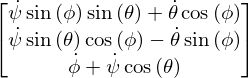

In [6]:
omega = simplify(Matrix([omega_tilde[2,1],omega_tilde[0,2],omega_tilde[1,0]]))
omega

In [7]:
w1,w2,w3 = symbols('omega_1,omega_2,omega_3')

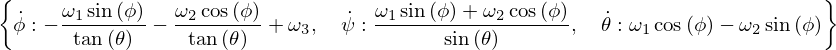

In [8]:
s0 = solve(omega - Matrix([w1,w2,w3]),[psid,thd,phd]); s0

## Find EOM (second derivatives of Euler Angles)

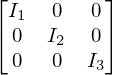

In [24]:
I1,I2,I3 = symbols("I_1,I_2,I_3",real=True,positive=True)
iWb_B = omega
I_G_B = diag(I1,I2,I3)
I_G_B

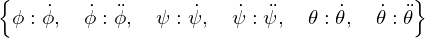

In [10]:
diffmap = {th:thd,psi:psid,ph:phd,thd:thdd,psid:psidd,phd:phdd}
diffmap

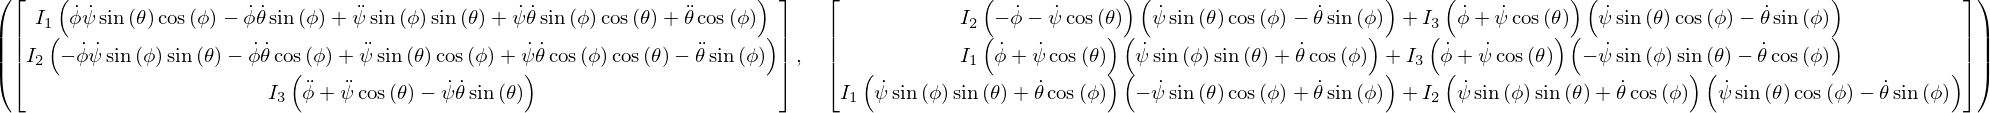

In [11]:
t1 = I_G_B*difftotalmat(iWb_B,t,diffmap) 
t2 = skew(iWb_B)*I_G_B*iWb_B
t1,t2

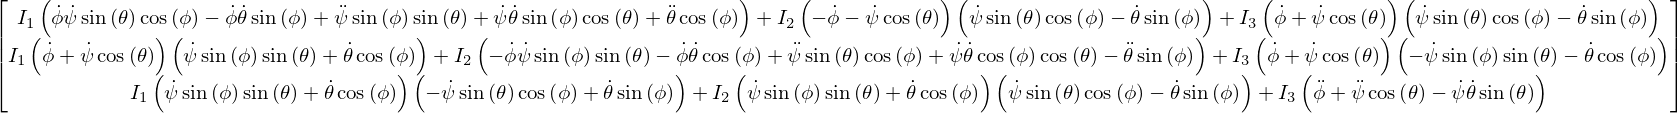

In [12]:
dh_G_B = t1+t2
dh_G_B

In [13]:
t3 = expand(dh_G_B[0]*cos(ph)*I2 - dh_G_B[1]*sin(ph)*I1)

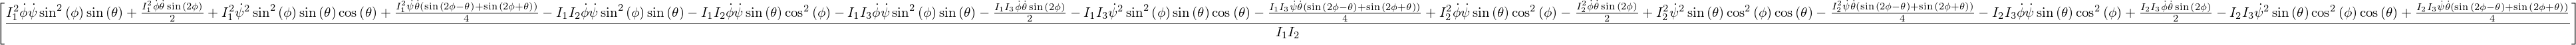

In [14]:
sol_thdd = simplify(solve(t3,thdd)) 
sol_thdd

In [15]:
t4= expand(dh_G_B[0]*sin(ph)*I2 + dh_G_B[1]*cos(ph)*I1)
t4

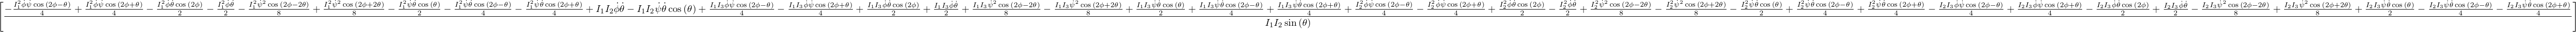

In [16]:
sol_psidd = simplify(solve(t4,psidd)) 
sol_psidd

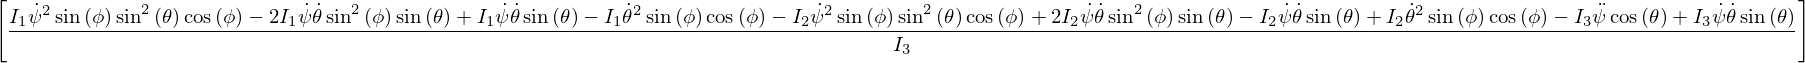

In [17]:
sol_phdd = solve(dh_G_B[2],phdd)
sol_phdd

## Find initial orientation such that $\mathbf h$ is down-pointing

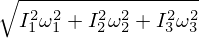

In [25]:
h = sqrt(((I_G_B*Matrix([w1,w2,w3])).transpose()*(I_G_B*Matrix([w1,w2,w3])))[0]);h

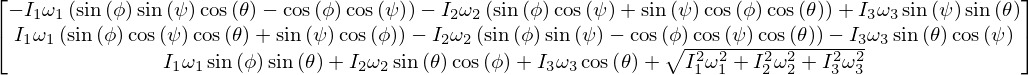

In [28]:
eqs1 = simplify(bCi.transpose()*I_G_B*Matrix([w1,w2,w3]) - Matrix([0,0,-h])); eqs1 #equal 0

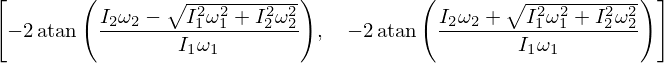

In [34]:
simplify(solve(simplify(eqs1[0]*cos(psi) + eqs1[1]*sin(psi)),ph)) #phi solution

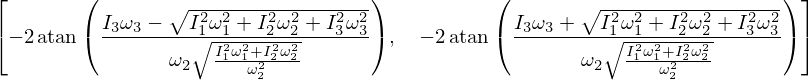

In [38]:
solve(simplify(expand(simplify(-eqs1[0]*sin(psi) + eqs1[1]*cos(psi)).subs(ph,atan(I1*w1/I2/w2)))),th) #th solution

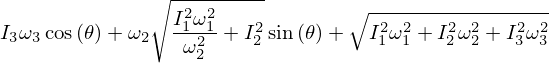

In [36]:
simplify(eqs1[2].subs(ph,atan(I1*w1/I2/w2)))

### Generate MATLAB Code

In [18]:
out = codegen(("eom1",sol_psidd[0]), 'Octave', argument_sequence=[th,thd,psi,psid,ph,phd,I1,I2,I3]);out

[('eom1.m',
  "function out1 = eom1(theta, thetadot, psi, psidot, phi, phidot, I_1, I_2, I_3)\n  %EOM1  Autogenerated by sympy\n  %   Code generated with sympy 1.3\n  %\n  %   See http://www.sympy.org/ for more information.\n  %\n  %   This file is part of 'project'\n\n  out1 = (-I_1.^2.*phidot.*psidot.*cos(2*phi - theta)/4 + I_1.^2.*phidot.*psidot.*cos(2*phi + theta)/4 - I_1.^2.*phidot.*thetadot.*cos(2*phi)/2 - I_1.^2.*phidot.*thetadot/2 - I_1.^2.*psidot.^2.*cos(2*phi - 2*theta)/8 + I_1.^2.*psidot.^2.*cos(2*phi + 2*theta)/8 - I_1.^2.*psidot.*thetadot.*cos(theta)/2 - I_1.^2.*psidot.*thetadot.*cos(2*phi - theta)/4 - I_1.^2.*psidot.*thetadot.*cos(2*phi + theta)/4 + I_1.*I_2.*phidot.*thetadot - I_1.*I_2.*psidot.*thetadot.*cos(theta) + I_1.*I_3.*phidot.*psidot.*cos(2*phi - theta)/4 - I_1.*I_3.*phidot.*psidot.*cos(2*phi + theta)/4 + I_1.*I_3.*phidot.*thetadot.*cos(2*phi)/2 + I_1.*I_3.*phidot.*thetadot/2 + I_1.*I_3.*psidot.^2.*cos(2*phi - 2*theta)/8 - I_1.*I_3.*psidot.^2.*cos(2*phi + 2*theta

In [19]:
codegen(("eom1",sol_thdd[0]), 'Octave', argument_sequence=[th,thd,psi,psid,ph,phd,I1,I2,I3])

[('eom1.m',
  "function out1 = eom1(theta, thetadot, psi, psidot, phi, phidot, I_1, I_2, I_3)\n  %EOM1  Autogenerated by sympy\n  %   Code generated with sympy 1.3\n  %\n  %   See http://www.sympy.org/ for more information.\n  %\n  %   This file is part of 'project'\n\n  out1 = (I_1.^2.*phidot.*psidot.*sin(phi).^2.*sin(theta) + I_1.^2.*phidot.*thetadot.*sin(2*phi)/2 + I_1.^2.*psidot.^2.*sin(phi).^2.*sin(theta).*cos(theta) + I_1.^2.*psidot.*thetadot.*(sin(2*phi - theta) + sin(2*phi + theta))/4 - I_1.*I_2.*phidot.*psidot.*sin(phi).^2.*sin(theta) - I_1.*I_2.*phidot.*psidot.*sin(theta).*cos(phi).^2 - I_1.*I_3.*phidot.*psidot.*sin(phi).^2.*sin(theta) - I_1.*I_3.*phidot.*thetadot.*sin(2*phi)/2 - I_1.*I_3.*psidot.^2.*sin(phi).^2.*sin(theta).*cos(theta) - I_1.*I_3.*psidot.*thetadot.*(sin(2*phi - theta) + sin(2*phi + theta))/4 + I_2.^2.*phidot.*psidot.*sin(theta).*cos(phi).^2 - I_2.^2.*phidot.*thetadot.*sin(2*phi)/2 + I_2.^2.*psidot.^2.*sin(theta).*cos(phi).^2.*cos(theta) - I_2.^2.*psidot.*thet

In [20]:
codegen(("eom1",sol_phdd[0]), 'Octave', argument_sequence=[th,thd,psi,psid,ph,phd,I1,I2,I3,psidd])

[('eom1.m',
  "function out1 = eom1(theta, thetadot, psi, psidot, phi, phidot, I_1, I_2, I_3, psiddot)\n  %EOM1  Autogenerated by sympy\n  %   Code generated with sympy 1.3\n  %\n  %   See http://www.sympy.org/ for more information.\n  %\n  %   This file is part of 'project'\n\n  out1 = (I_1.*psidot.^2.*sin(phi).*sin(theta).^2.*cos(phi) - 2*I_1.*psidot.*thetadot.*sin(phi).^2.*sin(theta) + I_1.*psidot.*thetadot.*sin(theta) - I_1.*thetadot.^2.*sin(phi).*cos(phi) - I_2.*psidot.^2.*sin(phi).*sin(theta).^2.*cos(phi) + 2*I_2.*psidot.*thetadot.*sin(phi).^2.*sin(theta) - I_2.*psidot.*thetadot.*sin(theta) + I_2.*thetadot.^2.*sin(phi).*cos(phi) - I_3.*psiddot.*cos(theta) + I_3.*psidot.*thetadot.*sin(theta))./I_3;\n\nend\n")]

In [21]:
codegen(("eom1",[s0[psid],s0[thd],s0[phd]]), 'Octave', argument_sequence=[w1,w2,w3,th,thd,psi,psid,ph,phd,I1,I2,I3,psidd])

[('eom1.m',
  "function [out1, out2, out3] = eom1(omega_1, omega_2, omega_3, theta, thetadot, psi, psidot, phi, phidot, I_1, I_2, I_3, psiddot)\n  %EOM1  Autogenerated by sympy\n  %   Code generated with sympy 1.3\n  %\n  %   See http://www.sympy.org/ for more information.\n  %\n  %   This file is part of 'project'\n\n  out1 = (omega_1.*sin(phi) + omega_2.*cos(phi))./sin(theta);\n  out2 = omega_1.*cos(phi) - omega_2.*sin(phi);\n  out3 = -omega_1.*sin(phi)./tan(theta) - omega_2.*cos(phi)./tan(theta) + omega_3;\n\nend\n")]

In [22]:
codegen(("eom1",bCi), 'Octave', argument_sequence=[th,thd,psi,psid,ph,phd,I1,I2,I3,psidd])

[('eom1.m',
  "function out1 = eom1(theta, thetadot, psi, psidot, phi, phidot, I_1, I_2, I_3, psiddot)\n  %EOM1  Autogenerated by sympy\n  %   Code generated with sympy 1.3\n  %\n  %   See http://www.sympy.org/ for more information.\n  %\n  %   This file is part of 'project'\n\n  out1 = [-sin(phi).*sin(psi).*cos(theta) + cos(phi).*cos(psi) sin(phi).*cos(psi).*cos(theta) + sin(psi).*cos(phi) sin(phi).*sin(theta); -sin(phi).*cos(psi) - sin(psi).*cos(phi).*cos(theta) -sin(phi).*sin(psi) + cos(phi).*cos(psi).*cos(theta) sin(theta).*cos(phi); sin(psi).*sin(theta) -sin(theta).*cos(psi) cos(theta)];\n\nend\n")]

In [23]:
codegen(("eom1",omega), 'Octave', argument_sequence=[w1,w2,w3,th,thd,psi,psid,ph,phd,I1,I2,I3,psidd])

[('eom1.m',
  "function out1 = eom1(omega_1, omega_2, omega_3, theta, thetadot, psi, psidot, phi, phidot, I_1, I_2, I_3, psiddot)\n  %EOM1  Autogenerated by sympy\n  %   Code generated with sympy 1.3\n  %\n  %   See http://www.sympy.org/ for more information.\n  %\n  %   This file is part of 'project'\n\n  out1 = [psidot.*sin(phi).*sin(theta) + thetadot.*cos(phi); psidot.*sin(theta).*cos(phi) - thetadot.*sin(phi); phidot + psidot.*cos(theta)];\n\nend\n")]